# Vector Analysis

In [1]:
import geopandas

## Reading in a shapefile

In [2]:
# File path
cities = geopandas.read_file('/vsicurl/https://github.com/mhweber/Rspatialworkshop/raw/master/inst/extdata/cities.shp')
# Check input data
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry
0,0.0,0.0,1,1658,MULINO,0,POINT (776899.812 1272019.125)
1,0.0,0.0,2,1368,HAMMOND,0,POINT (439320.844 1638725.000)
2,0.0,0.0,3,1366,FORT STEVENS,0,POINT (435108.000 1641590.750)
3,0.0,0.0,4,1382,GLIFTON,0,POINT (560721.000 1638699.875)
4,0.0,0.0,5,1384,BRADWOOD,0,POINT (568325.812 1632800.000)


In [3]:
# object type is GeoDataFrame
type(cities)

geopandas.geodataframe.GeoDataFrame

## geopandas.GeoDataFrame is a subclass of pandas.Dataframe - all the pandas functinoality is available to use on it

In [4]:
type(cities['CITY'])

pandas.core.series.Series

In [5]:
cities['CITY'].str.lower()

0                 mulino
1                hammond
2           fort stevens
3                glifton
4               bradwood
             ...        
893            cornelius
894               harbor
895            marshland
896          lake oswego
897    twelvemile corner
Name: CITY, Length: 898, dtype: object

## Plus it has a special geometry column

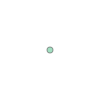

In [6]:
# Plus geometry column
cities.iloc[0]['geometry']

In [7]:
# Each value is a geometry object
type(cities.iloc[0]['geometry'])

shapely.geometry.point.Point

In [8]:
# With spatial attributes like x & y
cities.iloc[0]['geometry'].x, cities.iloc[0]['geometry'].y

(776899.8125, 1272019.125)

In [9]:
# Shapely geometry object has various spatial attributes/methods
dir(cities.iloc[0]['geometry'])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 

## GeoDataFrame spatial methods

In [10]:
# Distance to point
cities['distance_mulino'] = cities.distance(cities.iloc[0]['geometry'])
cities['distance_mulino']

0      0.000000e+00
1      4.984303e+05
2      5.033933e+05
3      4.256619e+05
4      4.167325e+05
           ...     
893    1.607713e+05
894    1.239386e+06
895    3.710563e+05
896    7.702938e+04
897    1.108091e+05
Name: distance_mulino, Length: 898, dtype: float64

In [11]:
# Buffer
gdf_buff = cities.buffer(100)
gdf_buff

0      POLYGON ((776999.812 1272019.125, 776999.331 1...
1      POLYGON ((439420.844 1638725.000, 439420.362 1...
2      POLYGON ((435208.000 1641590.750, 435207.518 1...
3      POLYGON ((560821.000 1638699.875, 560820.518 1...
4      POLYGON ((568425.812 1632800.000, 568425.331 1...
                             ...                        
893    POLYGON ((656822.688 1378812.750, 656822.206 1...
894    POLYGON ((290049.125 132301.000, 290048.643 13...
895    POLYGON ((605256.125 1600936.875, 605255.643 1...
896    POLYGON ((756741.562 1346336.875, 756741.081 1...
897    POLYGON ((816662.000 1375486.875, 816661.518 1...
Length: 898, dtype: geometry

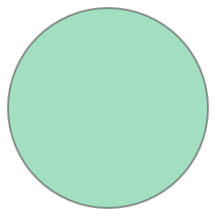

In [12]:
gdf_buff[0]

## Writing results to a shapefile

In [13]:
gdf_buff.to_file(r'C:\Users\jbousqui\Local_GIS\temp_test\OS_gdf_example.shp')

# Raster Analysis

In [14]:
import rasterio
from matplotlib import pyplot
import rioxarray
import geopandas as gpd
import rasterstats

## Reading in a tiff

In [15]:
raster_in = 'https://github.com/jbousquin/Python_OpenSource_GIS/raw/main/extdata/NLCD_2021_Tree_Canopy_mulino.tif'

### Data structure

In [16]:
canopy = rasterio.open(raster_in)
type(canopy)

rasterio.io.DatasetReader

In [17]:
# Has shape of grid (rows, columns)
canopy.shape

(25, 25)

In [18]:
# Has spatial information for grid as a whole, not individual grid cells
canopy.bounds

BoundingBox(left=-2059275.0, bottom=2759745.0, right=-2058525.0, top=2760495.0)

In [19]:
canopy.close()  # Good house-keeping

### Data Array

In [20]:
# A raster dataset can be multi-band, each accessed by the band's index starting at 1
with rasterio.open(raster_in) as src:
        image = src.read(1) # first band as array

In [21]:
# Note same grid shape
image.shape

(25, 25)

In [22]:
# As an array, you can see each cell has an integer value 0-100
image

array([[ 0,  0, 43, 70, 52, 14, 18, 36, 55, 65, 73, 56, 28, 16,  0,  0,
         0,  0,  0,  0,  0, 73, 42,  0,  0],
       [ 0,  0, 43, 73, 62, 18, 24, 27, 65, 69, 67, 33,  0,  0,  0,  0,
         0,  0,  0,  0, 22, 59, 37,  5,  0],
       [ 0,  0, 34, 71, 70, 36, 39, 66, 69, 63, 21,  0,  0, 13, 29,  0,
         0,  0,  0,  0,  0,  0, 17, 36,  0],
       [ 0, 11, 22, 45, 45,  0, 64, 68, 66, 33,  0,  0,  0, 26, 15,  0,
         0,  0,  0,  0,  0,  0, 39, 50,  0],
       [ 6,  6,  9,  0, 25,  0, 31, 32, 34, 32,  0,  0,  0, 11,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21, 32, 32, 23,  0,  0,  0,  0,
         0,  0,  0, 21,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0, 18, 16, 12, 11,  0, 27, 22,  0,  0,  0,  0,
         0,  0, 17, 25, 13,  9, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  6,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 27, 22, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

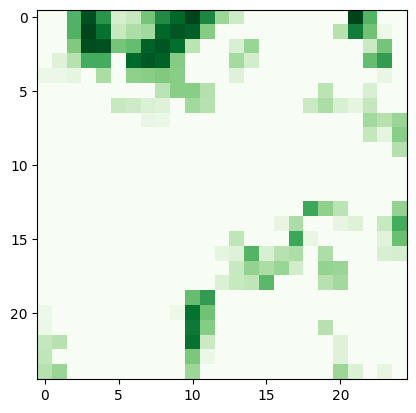

In [23]:
# Quick plot
pyplot.imshow(image, cmap='Greens')

## rioxarray - Combining rasterio and xarray

In [24]:
canopy_valu = rioxarray.open_rasterio(raster_in)

In [25]:
canopy_valu

<xarray.DataArray (band: 1, y: 25, x: 25)> Size: 625B
[625 values with dtype=uint8]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 200B -2.059e+06 -2.059e+06 ... -2.059e+06
  * y            (y) float64 200B 2.76e+06 2.76e+06 ... 2.76e+06 2.76e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

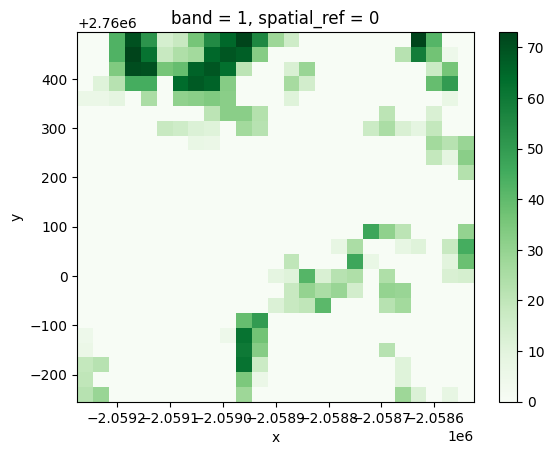

In [26]:
canopy_valu.plot(cmap='Greens')

### Raster to Raster Analysis

In [27]:
# rescaling by an upscale factor (doubles the number of cells)
upscale_factor = 2

In [28]:
new_width = canopy_valu.rio.width * upscale_factor
new_height = canopy_valu.rio.height * upscale_factor

In [29]:
canopy_upsampled_bi = canopy_valu.rio.reproject(
    canopy_valu.rio.crs,
    shape=(new_height, new_width),
    resampling=rasterio.enums.Resampling.bilinear)

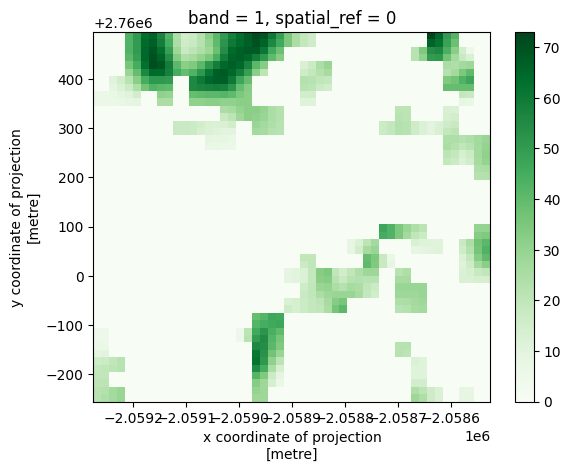

In [30]:
canopy_upsampled_bi.plot(cmap='Greens')

In [31]:
canopy_upsampled_avg = canopy_valu.rio.reproject(
    canopy_valu.rio.crs,
    shape=(new_height, new_width),
    resampling=rasterio.enums.Resampling.average)

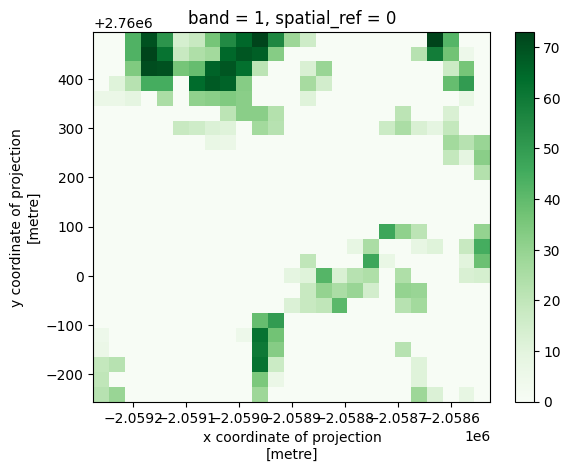

In [32]:
canopy_upsampled_avg.plot(cmap='Greens')

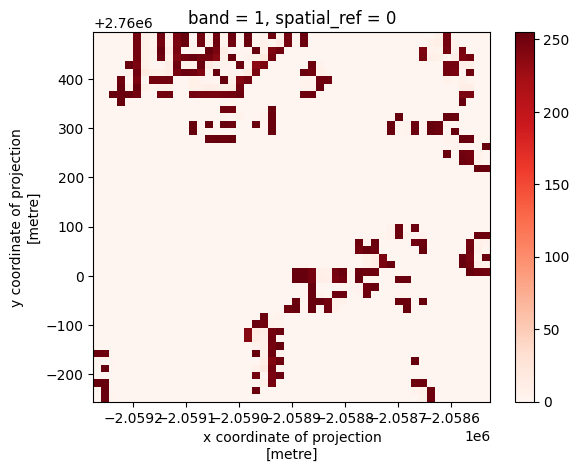

In [33]:
canopy_diff = canopy_upsampled_avg - canopy_upsampled_bi
canopy_diff.plot(cmap='Reds')

In [34]:
canopy_upsampled_avg[0,1][5]

<xarray.DataArray ()> Size: 1B
array(43, dtype=uint8)
Coordinates:
    x            float64 8B -2.059e+06
    y            float64 8B 2.76e+06
    band         int32 4B 1
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [35]:
canopy_upsampled_bi[0,1][5]

<xarray.DataArray ()> Size: 1B
array(50, dtype=uint8)
Coordinates:
    x            float64 8B -2.059e+06
    y            float64 8B 2.76e+06
    band         int32 4B 1
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0
    _FillValue:              0

In [36]:
canopy_diff[0,1][5]

<xarray.DataArray ()> Size: 1B
array(249, dtype=uint8)
Coordinates:
    x            float64 8B -2.059e+06
    y            float64 8B 2.76e+06
    band         int32 4B 1
    spatial_ref  int32 4B 0

### Writing to local file

In [37]:
out_file = r'C:\Users\jbousqui\Local_GIS\temp_test\OS_canopy_example.tif'
#canopy_upsampled_bi.rio.to_raster(out_file)

## Raster / vector Analysis

Inputs must be in the same coordinate reference system

In [38]:
# Raster CRS
nlcd_crs = canopy_valu.rio.crs
nlcd_crs

CRS.from_epsg(5070)

In [39]:
# Vecotr - Polygon
in_poly = 'https://github.com/jbousquin/Python_OpenSource_GIS/raw/main/extdata/OS_gdf_example.shp'
gdf = gpd.read_file(in_poly)

In [40]:
# Deal with crs
gdf = gdf.set_crs(2992)
gdf = gdf.to_crs(nlcd_crs)

In [41]:
# Zonal stats
stats = rasterstats.zonal_stats(gdf.iloc[1]['geometry'], raster_in)
stats

[{'count': 0, 'min': None, 'max': None, 'mean': None}]

In [42]:
# Vector - Points
# copy GeoDataFrame
points = gdf.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid

In [43]:
points

,Id,geometry
0,1,POINT (-2791497.541 3409072.274)
1,2,POINT (-2791477.348 3409062.461)
2,3,POINT (-2791341.718 3408968.387)
3,4,POINT (-2791438.829 3409015.781)
4,5,POINT (-2791322.590 3409020.965)


In [44]:
# Sample a point
pts = rasterstats.point_query(points, raster_in)
pts

[None, None, None, None, None]

# Plotting and Visualization

## Static Plotting with Geopandas and matplotlib
- We can load in some basic point spatial data of cities in Oregon to demonstrate plotting in `geopandas`
- `GeoPandas` provides a high-level interface to the `matplotlib` library for mapping
- You can use the default `plot` method on a `geopandas` `geoseries` or `geodataframe`

In [45]:
import geopandas as gpd
# File path
cities = gpd.read_file('https://github.com/mhweber/Rspatialworkshop/raw/master/inst/extdata/cities.shp')
# Check input data
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry
0,0.0,0.0,1,1658,MULINO,0,POINT (776899.812 1272019.125)
1,0.0,0.0,2,1368,HAMMOND,0,POINT (439320.844 1638725.000)
2,0.0,0.0,3,1366,FORT STEVENS,0,POINT (435108.000 1641590.750)
3,0.0,0.0,4,1382,GLIFTON,0,POINT (560721.000 1638699.875)
4,0.0,0.0,5,1384,BRADWOOD,0,POINT (568325.812 1632800.000)


<Axes: >

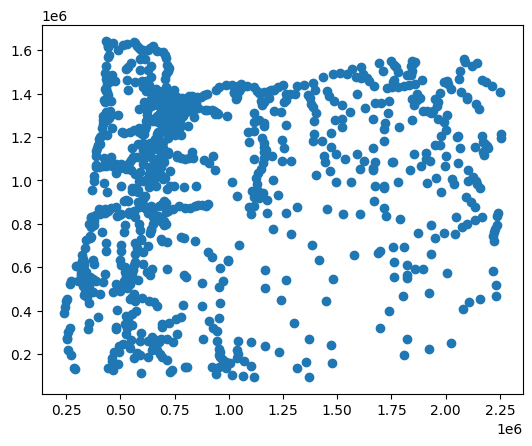

In [46]:
cities.plot()

What is odd about this plot? What do the axis labels denote?

In [47]:
cities.crs

<Projected CRS: PROJCS["Custom",GEOGCS["NAD83",DATUM["North_Americ ...>
Name: Custom
Axis Info [cartesian]:
- [east]: Easting (foot)
- [north]: Northing (foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

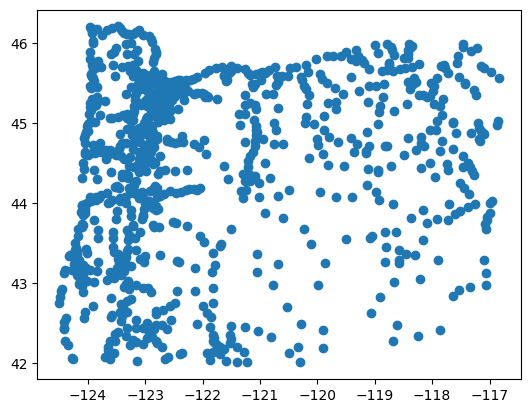

In [48]:
cities = cities.to_crs(4269)
cities.plot()

- We can switch to standard pandas plotting or back to 'geo' plotting as a method using the 'kind' keyword with plotting
- Here we'll scrape a web table of population to tie to our spatial cities `geopandas` dataframe to demonstrate

In [49]:
# !pip install lxml
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [50]:
page = requests.get("https://www.oregon-demographics.com/cities_by_population")
soup = BeautifulSoup(page.text, 'html.parser')

dfs = pd.read_html(page.text)

C:\Users\jbousqui\AppData\Local\Temp\ipykernel_23324\2867870904.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(page.text)


In [51]:
OregonCityPopulation = dfs[0]
OregonCityPopulation['City'] = OregonCityPopulation['City'].str.upper()
OregonCityPopulation.head()

,Rank,City,Population
0,1,PORTLAND,630498
1,2,EUGENE,177899
2,3,SALEM,177432
3,4,GRESHAM,110685
4,5,HILLSBORO,107730


- Join the population data to the spatial dataframe of Oregon cities
- Some cities in our `geodataframe` are not represented in the population data - thus the .notna() filter

In [52]:
cities = pd.merge(cities, OregonCityPopulation, left_on='CITY', right_on='City', how='left')
cities = cities[cities["Population"].notna()]
cities.head()

,AREA,PERIMETER,CITIES_,CITIES_ID,CITY,FLAG,geometry,Rank,City,Population
0,0.0,0.0,1,1658,MULINO,0,POINT (-122.57827 45.22108),154,MULINO,2203
6,0.0,0.0,7,1376,ASTORIA,1,POINT (-123.83443 46.17953),70,ASTORIA,9986
7,0.0,0.0,8,1370,WARRENTON,2,POINT (-123.92292 46.16368),95,WARRENTON,6255
8,0.0,0.0,9,1378,SVENSEN,0,POINT (-123.66137 46.16592),245,SVENSEN,812
12,0.0,0.0,13,1388,WESTPORT,0,POINT (-123.37178 46.13134),312,WESTPORT,367


- We can plot attributes using the 'geo' plot method, but standard matplotlib plotting methods might be what we're looking for

<Axes: >

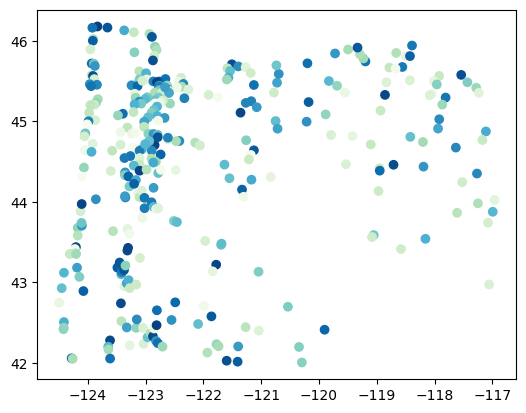

In [53]:
cities.plot(column="Population", cmap='GnBu')

(0.0, 50.0)

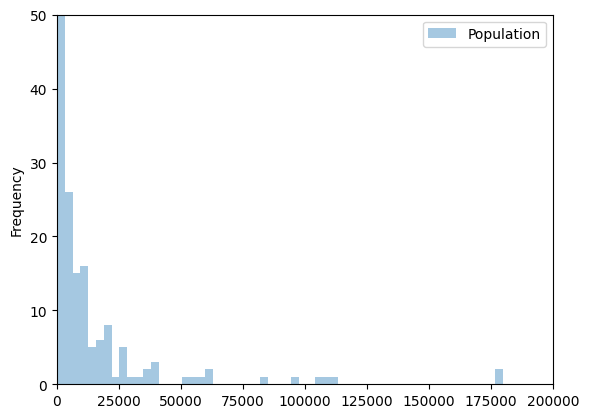

In [54]:
cities['Population'] = cities['Population'].astype(float)
ax = cities[["Population", "geometry"]].plot.hist(alpha=.4, bins=200)
ax.set_xlim(0, 200000)
ax.set_ylim(0, 50)

### Layering features in static plots
- Bring in county background data using [pygris](https://walker-data.com/pygris/) to demonstrate state layered plot in `geopandas`

In [55]:
#!pip install pygris
from pygris import counties
import matplotlib.pyplot as plt

In [56]:
# Get the default TIGER/Line file for counties in Oregon
OR_counties = counties(state = "OR", cache = True)

Using the default year of 2021
Using FIPS code '41' for input 'OR'


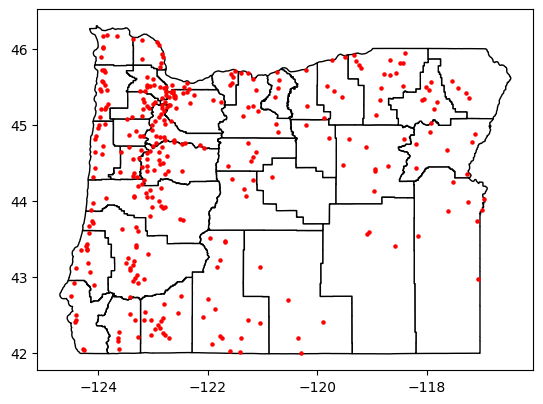

In [57]:
fig, ax = plt.subplots()

OR_counties.plot(ax=ax, color='white', edgecolor='black')


cities.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();

In [58]:
OR_counties_citycount = OR_counties.join(
    gpd.sjoin(cities, OR_counties).groupby("index_right").size().rename("cities"),
    how="left",
)
OR_counties_citycount.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,cities
18,41,063,01155135,41063,Wallowa,Wallowa County,06,H1,G4020,None,None,None,A,8147835333,14191752,+45.5937530,-117.1855796,"POLYGON ((-117.26601 45.15244, -117.26601 45.1...",4
87,41,013,01155128,41013,Crook,Crook County,06,H1,G4020,140,39260,None,A,7715390857,21004473,+44.1630537,-120.3715849,"POLYGON ((-120.10117 44.43821, -120.08281 44.4...",1
124,41,005,01155127,41005,Clackamas,Clackamas County,06,H1,G4020,440,38900,None,A,4845042011,31861237,+45.1604934,-122.1951274,"POLYGON ((-122.26394 45.46141, -122.26337 45.4...",18
172,41,007,01135846,41007,Clatsop,Clatsop County,06,H1,G4020,None,11820,None,A,2144846710,661654767,+46.0245094,-123.7050366,"POLYGON ((-123.66230 45.77466, -123.67371 45.7...",7
203,41,035,01155134,41035,Klamath,Klamath County,06,H1,G4020,None,28900,None,A,15410373389,484953082,+42.6837613,-121.6461682,"POLYGON ((-121.34925 43.11168, -121.34926 43.1...",16


### Choropleth map using our city count by county
As astute mappers, we know we shoud *never* make a choropleth map of count data so we'll use pandas divide method to get a density value for our map.  The **ALAND** field in our county data stands for "Census Area Land" and is a double value in square meters - we can convert to square kilometers and then get cites per square kilometer to represent how densely citied a county is ...if that was something we wanted to know for some strange reason.

<Axes: >

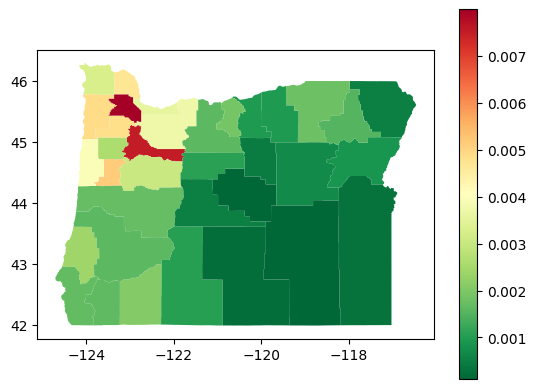

In [59]:
OR_counties_citycount['AreaSqKm'] = OR_counties_citycount['ALAND'] * 1e-6
OR_counties_citycount['CitySqKm'] = OR_counties_citycount['cities'].div(OR_counties_citycount['AreaSqKm'].values,axis=0)
OR_counties_citycount.plot(column='CitySqKm', cmap='RdYlGn_r', legend=True)

## Interactive Plotting
- `Geopandas` has built in basic interactive plotting capability
- The explore method is using `folium` under the hood

In [60]:
cities.explore()

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

### Folium
Folium example based on material [here](https://www.geeksforgeeks.org/visualizing-geospatial-data-using-folium-in-python/)

In [ ]:
import folium

In [ ]:
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Create a Map instance
m = folium.Map(location=[44.5, -123.2], zoom_start=10, control_scale=True)
m

### Convert points to GeoJSON to add as markers in Folium

In [ ]:
cities_gjson = folium.features.GeoJson(cities, name="Cities")

In [ ]:
cities_gjson.data.get('features')[0:1]

### Add markers to map and change the basemap to cartodb positron

In [ ]:
# Create a Map instance
m = folium.Map(
    location=[44.5, -123.2], tiles="cartodbpositron", zoom_start=11, control_scale=True
)

# Add points to the map instance
cities_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
# m.add_child(points_gjson)

# Show map
m

### Visualizing Raster Data

- For this example we demonstrate how we can read small area from an online raster and plot it with the .plot method for a raster object using `matplotlib`

In [ ]:
from shapely.geometry import box
from rioxarray import open_rasterio

cog_url = 'https://opentopography.s3.sdsc.edu/raster/SRTM_GL1/SRTM_GL1_srtm.vrt'

In [ ]:
chunk1 = open_rasterio(
    filename=cog_url, 
    chunks='auto', 
    parse_coordinates=False,
    masked=True
).rio.clip_box(minx=-123.38,
    miny=44.58,
    maxx=-123.08,
    maxy=44.78)

chunk2 = open_rasterio(
    filename=cog_url, 
    chunks='auto', 
    parse_coordinates=False,
    masked=True
).rio.clip_box(minx=-122.38,
    miny=45.58,
    maxx=-122.08,
    maxy=45.78)

In [ ]:
chunk1.plot()

In [ ]:
chunk2.plot()

### We can plot rasters as well with `leafmap`

In [ ]:
import leafmap
url = "https://open.gishub.org/data/raster/srtm90.tif"
image = "srtm90.tif"
if not os.path.exists(image):
    leafmap.download_file(url, image)
leafmap.plot_raster(image, cmap="terrain", figsize=(15, 10))

In [ ]:
m = leafmap.Map()
url = "https://github.com/opengeos/data/releases/download/raster/Libya-2023-07-01.tif"
m.add_cog_layer(url, name="Fire (pre-event)")
m

In [ ]:
# import leafmap
m = leafmap.Map()
url ="https://ss6imagery.arcgisonline.com/imagery_sample/landsat8/Bolivia_LC08_L1TP_001069_20190719_MS.tiff"
m.add_cog_layer(url, name="Landsat Sample")
m

In [ ]:
m = leafmap.Map()
m

## Resources

### General Python Geospatial

[Introduction to Python for Geographic Data Analysis](https://pythongis.org/index.html)

[EarthDataScience](https://www.earthdatascience.org/tutorials/python/)

### Visualization
[pyviz](https://pyviz.org/)

[visualizing geospatial data in Python](https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621)